In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    import scipy.cluster.hierarchy as sch
    from scipy.cluster.hierarchy import linkage
    from sklearn.cluster import DBSCAN
except Exception as e:
    print(e)
else:
    print('Requirement is satisfied')

Requirement is satisfied


In [2]:
crime_data = pd.read_csv('crime_data.csv')

In [6]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
crime_data = crime_data.rename(columns={'Unnamed: 0':'States'})

In [11]:
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [ ]:
# writing loop to check datatype other than integer, if found any that will be replaced by Nan.

def column_preprocessor(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [17]:
column_preprocess(crime_data[crime_data.columns])

In [18]:
crime_data.isna().any().sum()

0

array([[<AxesSubplot:title={'center':'Murder'}>]], dtype=object)

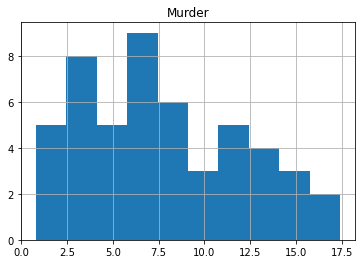

In [27]:
crime_data.hist('Murder')

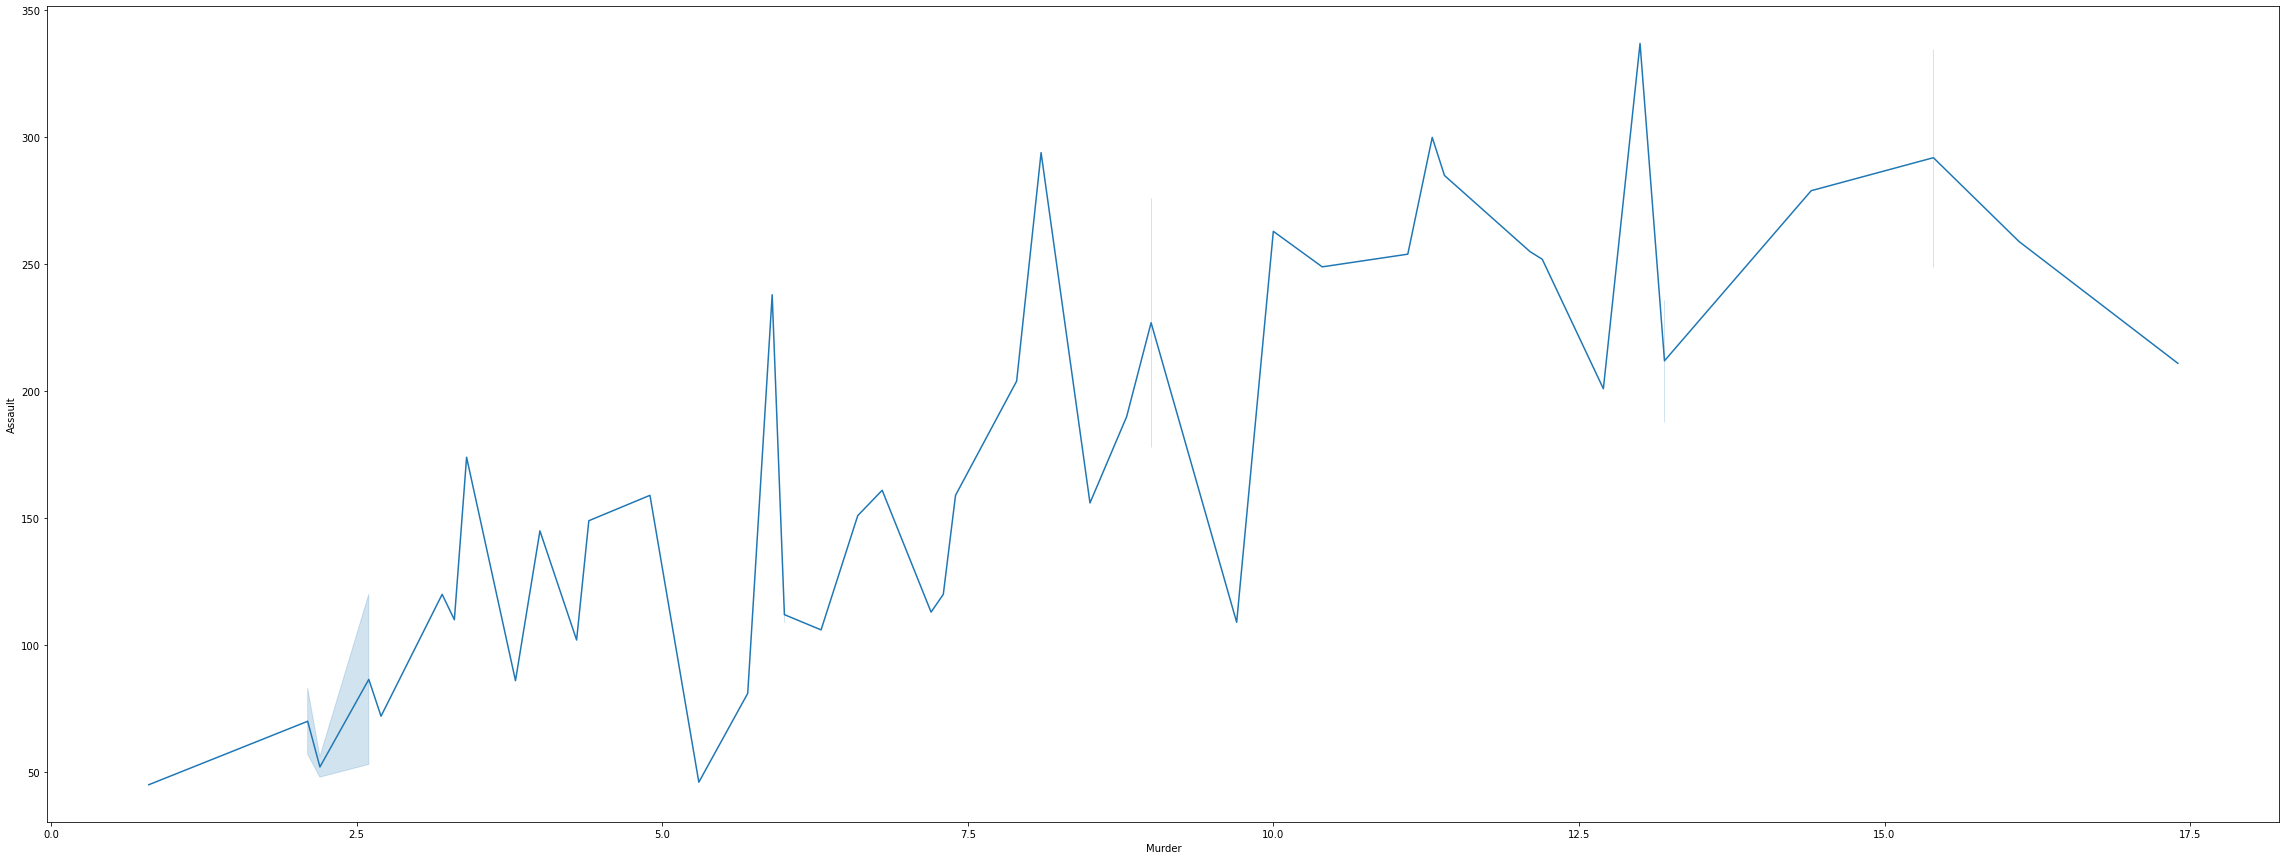

In [54]:
fig, ax = plt.subplots(figsize =(40,15))
ax = sns.lineplot(x= 'Murder', y='Assault',data = crime_data)

In [32]:
#normalize and standerdize data for any kind of clustering
from sklearn.preprocessing import scale
crime_data_std = crime_data.copy()

In [34]:
crime_data_std.drop('States',axis=1,inplace=True)

In [35]:
crime_data_std = scale(crime_data_std)

In [37]:
crime_data_std = pd.DataFrame(crime_data_std)

In [42]:
crime_data_std = crime_data_std.rename(columns={0:'Murder', 1:'Assault',2: 'UrbanPop', 3:'Rape'})

In [43]:
crime_data_std.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [44]:
from sklearn.cluster import KMeans
%matplotlib inline

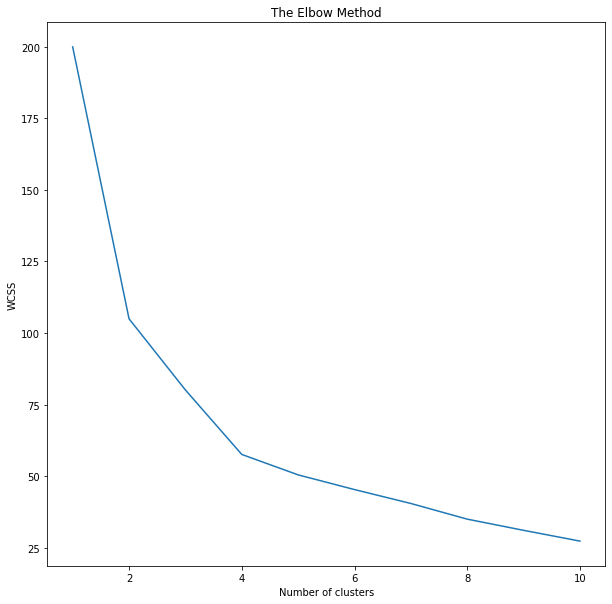

In [52]:
plt.figure(figsize=(10,10))
WCSS = [] #Within cluster sum of squares

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    Kmeans.fit(crime_data_std)
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_data_std)

In [57]:
cluster = y_kmeans

In [58]:
crime_data['Cluster'] = cluster

In [59]:
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [61]:
kmeans_mean_cluster = pd.DataFrame(round(crime_data.groupby('Cluster').mean(),0))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.0,244.0,54.0,21.0
1,6.0,139.0,74.0,19.0
2,4.0,79.0,52.0,12.0
3,11.0,257.0,76.0,33.0


<Figure size 1440x2880 with 0 Axes>

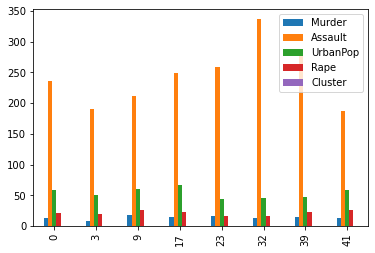

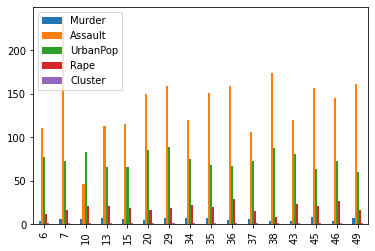

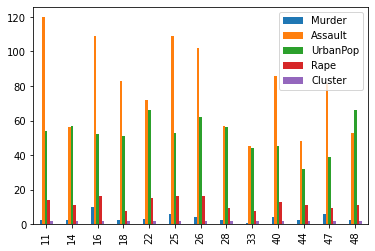

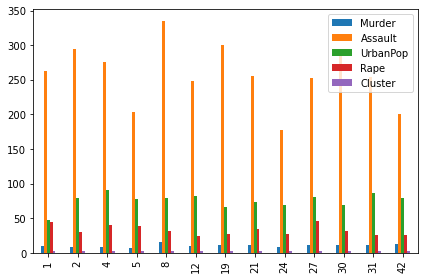

<Figure size 1440x2880 with 0 Axes>

In [82]:
crime_data.groupby(['Cluster']).plot(kind = 'bar')
# plt.xlabel('Clusters', fontsize='large')
# plt.ylabel('ID counts', fontsize='large')
plt.tight_layout()
plt.figure(figsize=(20,40))

In [75]:
# plt.figure(figsize=(12,6))
# sns.scatterplot(x=kmeans_mean_cluster['Murder'], y = kmeans_mean_cluster['Assault'],hue=y_kmeans)

In [83]:
crime_data[crime_data['Cluster']==0]

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [92]:
crime_data[crime_data['Cluster']==0]

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [93]:
crime_data[crime_data['Cluster']==1]

,States,Murder,Assault,UrbanPop,Rape,Cluster
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
20,Massachusetts,4.4,149,85,16.3,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1


In [94]:
crime_data[crime_data['Cluster']==2]

,States,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [95]:
crime_data[crime_data['Cluster']==3]

,States,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3


<AxesSubplot:xlabel='Cluster'>

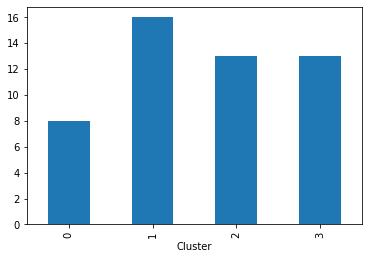

In [101]:
crime_data.groupby(['Cluster']).count()['States'].plot(kind = 'bar')